In [127]:
import pandas as pd

In [128]:
import numpy as np

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [195]:
womens_shoes = pd.read_csv('Datafiniti_Womens_Shoes_Jun19.csv')
womens_shoes.head()

,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean / upc,...,prices.dateSeen,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,2019-05-01T09:27:22Z,NaN,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,656000000000,...,2019-04-19T07:09:29Z,NaN,NaN,Online only,NaN,NaN,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,2019-05-01T09:27:19Z,NaN,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,NaN,192000000000,...,2019-04-24T09:14:11Z,NaN,NaN,Online only,NaN,NaN,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,2019-05-01T09:26:59Z,NaN,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,709000000000,...,2019-04-25T12:35:00.000Z,NaN,NaN,Online only,NaN,NaN,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...
3,AWpyxomE0U_gzG0hkA1q,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black/Multi,NaN,884000000000,...,2019-04-30T19:49:00.000Z,NaN,NaN,Online only: 20% off,NaN,NaN,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...
4,AWpyxChWJbEilcB6RhWx,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,White,NaN,887000000000,...,2019-04-19T07:07:46Z,NaN,NaN,Online only: 50% off,NaN,NaN,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...


In [198]:
womens_shoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
id                     10000 non-null object
dateAdded              10000 non-null object
dateUpdated            10000 non-null object
asins                  5 non-null object
brand                  10000 non-null object
categories             10000 non-null object
primaryCategories      10000 non-null object
colors                 10000 non-null object
dimension              465 non-null object
ean / upc              10000 non-null int64
imageURLs              2643 non-null object
keys                   10000 non-null object
manufacturer           1362 non-null object
manufacturerNumber     1431 non-null object
name                   10000 non-null object
prices.amountMax       10000 non-null float64
prices.amountMin       10000 non-null float64
prices.availability    10000 non-null bool
prices.color           10000 non-null object
prices.condition       0 non-null float64
price

In [199]:
womens_shoes_small = womens_shoes.drop(['id','dateAdded','dateUpdated','asins','categories','primaryCategories',
                                        'imageURLs','dimension','keys','manufacturer','manufacturerNumber',
                                        'prices.condition','prices.dateAdded','prices.dateSeen','prices.isSale',
                                        'prices.merchant','prices.returnPolicy','prices.shipping','prices.sourceURLs',
                                        'sizes','sourceURLs','prices.currency','colors','prices.amountMin',
                                        'name'], axis=1)
womens_shoes_small.head()

,brand,ean / upc,prices.amountMax,prices.availability,prices.color,prices.offer,prices.size
0,City Classified,656000000000,29.95,True,Black,Online only,8
1,Skechers,192000000000,84.00,True,Taupe,Online only,6 M US
2,Floral,709000000000,49.95,True,Black,Online only,5
3,Jambu,884000000000,127.20,False,Black/Multi,Online only: 20% off,9.5 BM US
4,Trotters,887000000000,47.66,False,White,Online only: 50% off,11


In [200]:
womens_shoes_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
brand                  10000 non-null object
ean / upc              10000 non-null int64
prices.amountMax       10000 non-null float64
prices.availability    10000 non-null bool
prices.color           10000 non-null object
prices.offer           10000 non-null object
prices.size            10000 non-null object
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 478.6+ KB


In [201]:
import re 

In [202]:
def clean_price_offer(price_offer):
    return re.sub(r"[^0-9]+", "", price_offer)

In [203]:
womens_shoes_small['prices.size'] = womens_shoes_small['prices.size'].apply(clean_price_offer)
womens_shoes_small.head()

,brand,ean / upc,prices.amountMax,prices.availability,prices.color,prices.offer,prices.size
0,City Classified,656000000000,29.95,True,Black,Online only,8
1,Skechers,192000000000,84.00,True,Taupe,Online only,6
2,Floral,709000000000,49.95,True,Black,Online only,5
3,Jambu,884000000000,127.20,False,Black/Multi,Online only: 20% off,95
4,Trotters,887000000000,47.66,False,White,Online only: 50% off,11


In [204]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [205]:
lb_make.fit(womens_shoes_small['brand'])

LabelEncoder()

In [206]:
womens_shoes_small['brand_codes'] = lb_make.transform(womens_shoes_small['brand'])
womens_shoes_small.head()

,brand,ean / upc,prices.amountMax,prices.availability,prices.color,prices.offer,prices.size,brand_codes
0,City Classified,656000000000,29.95,True,Black,Online only,8,110
1,Skechers,192000000000,84.00,True,Taupe,Online only,6,373
2,Floral,709000000000,49.95,True,Black,Online only,5,184
3,Jambu,884000000000,127.20,False,Black/Multi,Online only: 20% off,95,226
4,Trotters,887000000000,47.66,False,White,Online only: 50% off,11,420


In [207]:
lb_make.fit(womens_shoes_small['prices.availability'])
womens_shoes_small['availability_codes'] = lb_make.transform(womens_shoes_small['prices.availability'])
womens_shoes_small.head()

,brand,ean / upc,prices.amountMax,prices.availability,prices.color,prices.offer,prices.size,brand_codes,availability_codes
0,City Classified,656000000000,29.95,True,Black,Online only,8,110,1
1,Skechers,192000000000,84.00,True,Taupe,Online only,6,373,1
2,Floral,709000000000,49.95,True,Black,Online only,5,184,1
3,Jambu,884000000000,127.20,False,Black/Multi,Online only: 20% off,95,226,0
4,Trotters,887000000000,47.66,False,White,Online only: 50% off,11,420,0


In [208]:
lb_make.fit(womens_shoes_small['prices.color'])
womens_shoes_small['color_codes'] = lb_make.transform(womens_shoes_small['prices.color'])
womens_shoes_small.head()

,brand,ean / upc,prices.amountMax,prices.availability,prices.color,prices.offer,prices.size,brand_codes,availability_codes,color_codes
0,City Classified,656000000000,29.95,True,Black,Online only,8,110,1,76
1,Skechers,192000000000,84.00,True,Taupe,Online only,6,373,1,1652
2,Floral,709000000000,49.95,True,Black,Online only,5,184,1,76
3,Jambu,884000000000,127.20,False,Black/Multi,Online only: 20% off,95,226,0,345
4,Trotters,887000000000,47.66,False,White,Online only: 50% off,11,420,0,1743


In [209]:
def convert_size_type(size):
    if size == '':
        return 0
    else:
        return float(size)

In [210]:
womens_shoes_small['prices.size'] = womens_shoes_small['prices.size'].apply(convert_size_type)
womens_shoes_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
brand                  10000 non-null object
ean / upc              10000 non-null int64
prices.amountMax       10000 non-null float64
prices.availability    10000 non-null bool
prices.color           10000 non-null object
prices.offer           10000 non-null object
prices.size            10000 non-null float64
brand_codes            10000 non-null int64
availability_codes     10000 non-null int64
color_codes            10000 non-null int64
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 713.0+ KB


In [186]:
def get_discount(offer):
    if 'Online only:' in offer:
        return float(offer[12:offer.index('%')])
    elif 'Was ' in offer:
        return float(offer[3:])
    elif offer == '' or 'Online only' in offer:
        return 0

In [162]:
womens_shoes_small['offer'] = womens_shoes_small['prices.offer'].apply(get_discount)
womens_shoes_small.head()

,brand,ean / upc,prices.amountMax,prices.availability,prices.color,prices.offer,prices.size,offer
0,City Classified,656000000000,29.95,True,Black,Online only,8.0,0.0
1,Skechers,192000000000,84.00,True,Taupe,Online only,6.0,0.0
2,Floral,709000000000,49.95,True,Black,Online only,5.0,0.0
3,Jambu,884000000000,127.20,False,Black/Multi,Online only: 20% off,95.0,20.0
4,Trotters,887000000000,47.66,False,White,Online only: 50% off,11.0,50.0


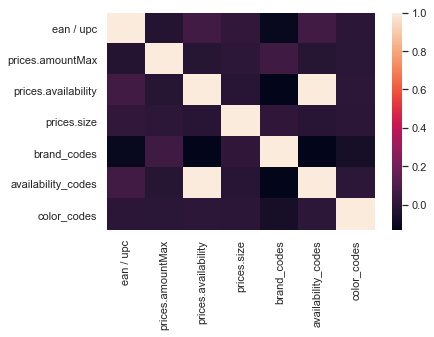

In [211]:
sns.heatmap(womens_shoes_small.corr())

In [212]:
from sklearn.model_selection import train_test_split

In [220]:
X_train = womens_shoes_small.drop(['brand', 'prices.availability', 'prices.color', 'prices.offer', 'prices.amountMax'], 
                            axis=1)
y_train = womens_shoes_small['prices.amountMax']

In [221]:
import xgboost as xgb

In [224]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=500, 
                             learning_rate=0.5, 
                             gamma=0, 
                             subsample=0.75,
                             colsample_bytree=1,
                             max_depth=7)

In [225]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.5, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.75, verbosity=1)

In [226]:
predictions = xgb_model.predict(X_test)

In [227]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(metrics.explained_variance_score(y_test, predictions))

MAE: 5.869413662255606
MSE: 112.99064940335954
RMSE: 10.629705988566172
0.9957764627985265


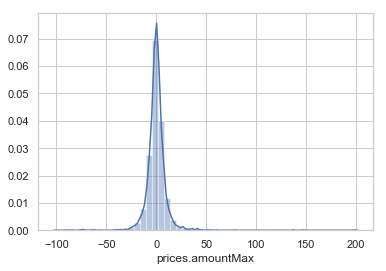

In [228]:
sns.distplot((y_test-predictions),bins=50);

In [233]:
womens_shoes_test = pd.read_csv('7210_1.csv',low_memory=False)
womens_shoes_test.head()

,id,asins,brand,categories,colors,count,dateAdded,dateUpdated,descriptions,dimension,...,skus,sourceURLs,upc,vin,websiteIDs,weight,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AVpe__eOilAPnD_xSt-H,NaN,Novica,"Access.,Clothing,Shoes,Women's Clothing",Purple,NaN,2017-02-03T22:06:24Z,2017-03-28T11:53:51Z,"[{""dateSeen"":[""2017-03-26T05:04:46.539Z"",""2017...",NaN,...,"[{""sourceURLs"":[""https://www.overstock.com/Wor...",https://www.overstock.com/Worldstock-Fair-Trad...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
womens_shoes_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33801 entries, 0 to 33800
Data columns (total 52 columns):
id                     33801 non-null object
asins                  2422 non-null object
brand                  32817 non-null object
categories             33801 non-null object
colors                 19844 non-null object
count                  0 non-null float64
dateAdded              33801 non-null object
dateUpdated            33801 non-null object
descriptions           28425 non-null object
dimension              1177 non-null object
ean                    9778 non-null float64
features               27181 non-null object
flavors                0 non-null float64
imageURLs              22309 non-null object
isbn                   0 non-null float64
keys                   33801 non-null object
manufacturer           9279 non-null object
manufacturerNumber     31434 non-null object
merchants              15382 non-null object
name                   33801 non-null object
pri